In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
x = df.iloc[:,:-1].values

In [7]:
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [8]:
 y= df.Sales

In [9]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [10]:
import numpy as np
from scipy import stats
df_zscore = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [11]:
import pandas as pd

def remove_outliers(dataset,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = dataset[col].mean()
        sd = df[col].std()
        
        df = df[(dataset[col] <= mean+(n_std*sd))]
        
    return df

In [12]:
columns = df.columns
n_std = 4
df_no_outliers = remove_outliers(df_zscore, columns, n_std)

Working on column: TV
Working on column: Radio
Working on column: Newspaper
Working on column: Sales


In [13]:
df_no_outliers.shape

(198, 4)

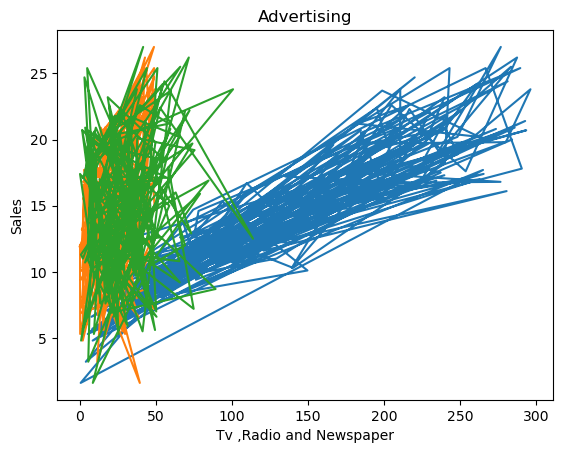

In [14]:
plt.plot(x,y)
plt.xlabel('Tv ,Radio and Newspaper')
plt.ylabel('Sales')
plt.title('Advertising')
plt.show()

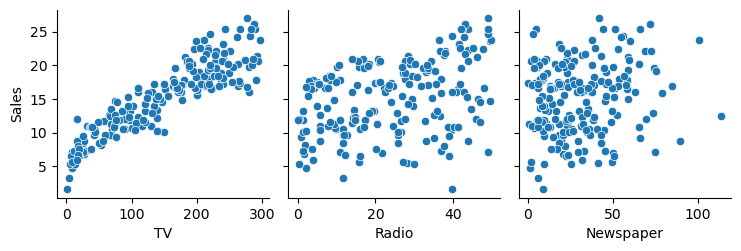

In [15]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars ='Sales',kind ='scatter',diag_kind = None)

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state =0)

In [18]:
x_train

array([[265.2,   2.9,  43. ],
       [197.6,   3.5,   5.9],
       [218.5,   5.4,  27.4],
       [147.3,  23.9,  19.1],
       [171.3,  39.7,  37.7],
       [217.7,  33.5,  59. ],
       [262.7,  28.8,  15.9],
       [163.5,  36.8,   7.4],
       [100.4,   9.6,   3.6],
       [ 76.3,  27.5,  16. ],
       [184.9,  43.9,   1.7],
       [134.3,   4.9,   9.3],
       [273.7,  28.9,  59.7],
       [296.4,  36.3, 100.9],
       [ 96.2,  14.8,  38.9],
       [109.8,  47.8,  51.4],
       [255.4,  26.9,   5.5],
       [204.1,  32.9,  46. ],
       [240.1,  16.7,  22.9],
       [193.7,  35.4,  75.6],
       [191.1,  28.7,  18.2],
       [ 89.7,   9.9,  35.7],
       [ 43. ,  25.9,  20.5],
       [ 38.2,   3.7,  13.8],
       [ 13.1,   0.4,  25.6],
       [239.3,  15.5,  27.3],
       [ 17.2,  45.9,  69.3],
       [210.7,  29.5,   9.3],
       [ 25.6,  39. ,   9.3],
       [177. ,   9.3,   6.4],
       [206.9,   8.4,  26.4],
       [ 66.1,   5.8,  24.2],
       [149.7,  35.6,   6. ],
       [12

In [19]:
y_train

131    17.7
96     16.7
181    17.2
19     14.6
153    16.0
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 140, dtype: float64

In [20]:
from sklearn import linear_model

In [21]:
from sklearn.linear_model import LinearRegression


In [22]:
model = LinearRegression()

In [23]:
model.fit(x_train,y_train)

LinearRegression()

In [24]:
y_predicted = model.predict(x_test)

In [25]:
y_predicted

array([10.68909303,  8.67371102,  9.59969914, 24.99989846, 14.73590568,
        8.37604918, 10.70350416, 18.37670708,  9.9670026 , 17.87946837,
       23.52765543, 10.70692059, 13.37566958, 17.10051561, 11.77005197,
       13.31194616, 21.13395461,  9.10945664, 14.24009701, 18.86885012,
       25.00670623, 12.42508633, 16.61899482, 13.84289673,  7.80458355,
       15.13012055, 14.69687153, 20.70140682, 16.9844145 ,  8.94984434,
       12.59168427, 20.93257626, 21.34337227, 21.89151357,  7.23908022,
        7.06001103,  9.28335812, 15.6840471 , 13.33894748,  7.28903633,
       11.05676585,  9.08768206, 15.60592891, 18.21716827, 18.9560652 ,
       13.47385617,  5.36520991, 10.59696871, 15.66036131, 10.98229096,
       12.20805533, 20.70970272, 20.70533061, 16.95931925,  9.96622132,
        9.44413497, 23.60505449, 15.99066008, 18.06706692,  8.25675464])

In [26]:
x_test

array([[ 69.2,  20.5,  18.3],
       [ 50. ,  11.6,  18.4],
       [ 90.4,   0.3,  23.2],
       [289.7,  42.3,  51.2],
       [170.2,   7.8,  35.2],
       [ 56.2,   5.7,  29.7],
       [  8.7,  48.9,  75. ],
       [240.1,   7.3,   8.7],
       [ 23.8,  35.1,  65.9],
       [197.6,  23.3,  14.2],
       [261.3,  42.7,  54.7],
       [ 87.2,  11.8,  25.9],
       [156.6,   2.6,   8.3],
       [187.8,  21.1,   9.5],
       [ 76.4,  26.7,  22.3],
       [120.2,  19.6,  11.6],
       [265.6,  20. ,   0.3],
       [  0.7,  39.6,   8.7],
       [ 74.7,  49.4,  45.7],
       [213.4,  24.6,  13.1],
       [287.6,  43. ,  71.8],
       [140.3,   1.9,   9. ],
       [175.1,  22.5,  31.5],
       [131.7,  18.4,  34.6],
       [ 53.5,   2. ,  21.4],
       [123.1,  34.6,  12.4],
       [165.6,  10. ,  17.6],
       [205. ,  45.1,  19.6],
       [224. ,   2.4,  15.6],
       [ 25.1,  25.7,  43.3],
       [ 67.8,  36.6, 114. ],
       [198.9,  49.4,  60. ],
       [280.7,  13.9,  37. ],
       [24

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mse = mean_squared_error(y_test,y_predicted)


In [29]:
mse

3.938015220480282

In [30]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_predicted)

In [31]:
mae

1.3662313868452753

In [32]:
from sklearn.metrics import mean_absolute_percentage_error
map_error = mean_absolute_percentage_error(y_test,y_predicted)

In [33]:
map_error

0.17222599691973411

In [34]:
accuracy = 100 - map_error

In [35]:
accuracy

99.82777400308026